## Data Loading and Processing Tutorial

In [1]:
from __future__ import print_function, division
import torch
import os
import pandas as pd
from skimage import io as sk_io,transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms,utils
from PIL import Image
import io

In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.ion() #interatve Mode로 설정. 

# 1. Using face dataset

In [3]:
landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')
n = 23
img_name = landmarks_frame.iloc[n,0]
landmarks = landmarks_frame.iloc[n,1:].as_matrix() #dataframe의 일부를 Numpy arr로 바꿔주는 부분. 
landmarks = landmarks.astype('float').reshape(-1,2) # 각  좌표 2차원 좌표벡터로 표현되게 바꾸는 부분

print('Image name : {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('Fist 4 Landmarks: {}'.format(landmarks[:4]))

Image name : 2711409561_a0786a3d3d.jpg
Landmarks shape: (68, 2)
Fist 4 Landmarks: [[ 179.  159.]
 [ 180.  186.]
 [ 182.  211.]
 [ 185.  238.]]


In [4]:
landmarks_frame.head()

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0805personali01.jpg,27,83,27,98,29,113,33,127,39,...,93,136,100,141,93,135,89,135,84,134
1,1084239450_e76e00b7e7.jpg,70,236,71,257,75,278,82,299,90,...,148,311,179,308,149,312,137,314,128,312
2,10comm-decarlo.jpg,66,114,65,128,67,142,68,156,72,...,128,162,136,167,127,166,121,165,116,164
3,110276240_bec305da91.jpg,42,140,45,161,51,180,61,200,73,...,144,197,180,189,147,204,136,208,125,209
4,1198_0_861.jpg,138,392,141,427,145,464,152,501,166,...,293,507,331,511,294,516,279,518,265,516


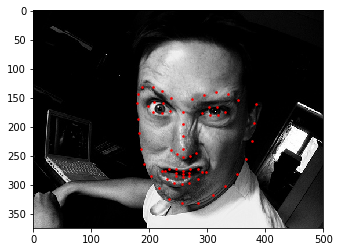

In [5]:

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(sk_io.imread(os.path.join('data/faces/', img_name)),landmarks)
plt.show()

#### io.imread( img_dir) : read each values of pixel by row
#### os.path.join('data/faces/', img_name) : make_full path

In [6]:
print(len(sk_io.imread(os.path.join('data/faces/', img_name))))
print(len(sk_io.imread(os.path.join('data/faces/', img_name))[0]))
print(os.path.join('data/faces/', img_name) )

375
500
data/faces/2711409561_a0786a3d3d.jpg


# 2. Dataset class

<b>torch.utils.data.Dataset</b>클래스는 dataset클래스를 상속. 
<n>그 안에 Override 할 수 있는 method로는
<n>__len__ : dataset size를 return
<n>__getitem__ : set 내의 각 sample마다 indexing
<n>__init__: 클래스의 Variable 초기화

In [162]:
class facedataset(Dataset): ## torch.utils.data.Dataset
    
    def __init__(self,csv_file,root_dir,transform=None):
        """
        csv:좌표값 마크
        root_dir : 이미지 폴더 경로
        transform : 뒤에 더 자세히
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self,idx):
        img_name = os.path.join(self.root_dir,self.landmarks_frame.iloc[idx,0])
        img = sk_io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx,1:].as_matrix()
        landmarks = landmarks.astype('float').reshape(-1,2)
        sample = {'img':img,'landmark':landmarks}
        
        if self.transform :
            sample = self.transform(sample)
        
        return sample
    
    def help():
        dict_keys =['image','landmark']
        print('dict_key is {}'.format(dict_keys))

In [163]:
face_dataset = facedataset(csv_file='./data/faces/face_landmarks.csv',root_dir='./data/faces/')

### len / index

In [164]:
len(face_dataset)

69

In [165]:
face_dataset[0]  ##딕셔너리 형태의 샘플 로딩

{'img': array([[[ 66,  59,  53],
         [ 66,  59,  53],
         [ 66,  59,  53],
         ..., 
         [ 59,  54,  48],
         [ 59,  54,  48],
         [ 59,  54,  48]],
 
        [[ 67,  60,  54],
         [ 67,  60,  54],
         [ 67,  60,  54],
         ..., 
         [ 59,  54,  48],
         [ 59,  54,  48],
         [ 59,  54,  48]],
 
        [[ 67,  60,  54],
         [ 67,  60,  54],
         [ 67,  60,  54],
         ..., 
         [ 59,  54,  48],
         [ 59,  54,  48],
         [ 59,  54,  48]],
 
        ..., 
        [[ 16,  15,  13],
         [ 18,  17,  15],
         [ 21,  17,  14],
         ..., 
         [155, 143, 131],
         [157, 145, 133],
         [157, 145, 133]],
 
        [[ 14,  13,  11],
         [ 17,  16,  14],
         [ 20,  16,  13],
         ..., 
         [154, 142, 130],
         [158, 146, 134],
         [158, 146, 134]],
 
        [[ 13,  12,  10],
         [ 16,  15,  13],
         [ 20,  16,  13],
         ..., 
         [153, 1

In [166]:
facedataset.help() #내가 기억못할 변수들은 help에 넣기.

dict_key is ['image', 'landmark']


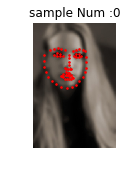

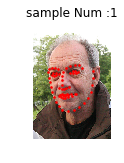

In [167]:
fig = plt.figure()
for i in range(len(face_dataset)):
    sample = face_dataset[i]
    #print("idx:{} img_shape:{} land_shape{}".format(i,sample['img'],sample['landmark']))
    ax = plt.subplot(1,4,i+1)
    plt.tight_layout()
    ax.set_title('sample Num :{}'.format(i))
    ax.axis('off')
    show_landmarks(sample['img'],sample['landmark'])
    
    if i==1:
        break

# 3. Transform : torchvision.transform.

<n>Resize(size, interpolation=2)
<n>CenterCrop(size)
<n>RandomCrop(size, padding=0)
<n>RandomHorizontalFlip
<n>RandomVerticalFlip
<n>RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)
<n>Grayscale(num_output_channels=1)
<n>RandomGrayscale(p=0.1)
<n>FiveCrop(size)
<n>TenCrop(size, vertical_flip=False)
<n>Pad(padding, fill=0)
<n>ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)
<n>RandomRotation(degrees, resample=False, expand=False, center=None)
<n>Normalize(mean, std)
<n>ToTensor
<n>ToPILImage(mode=None)

In [168]:
def imshow(img):
    fig = plt.figure()
    plt.imshow(img)

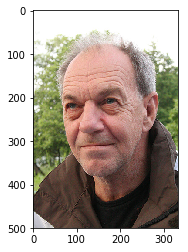

In [169]:
# torchvision.transform 을 한장씩 적용하고 싶다면 PIL로 그림을 읽어들이자!
#원본샘플 #돌리고 자르고 뒤집는 끔찍한 실험에 참가하게 된 이름 모를 할아버지. 
sample_img = Image.open('./data/faces/1084239450_e76e00b7e7.jpg')
imshow(sample_img)

### Resize(size, interpolation=2) : 사이즈 변경

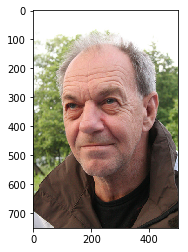

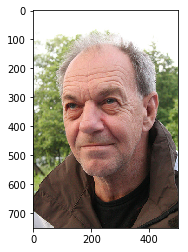

In [170]:
trans = transforms.Resize(500)
trans_img = trans(sample_img)
imshow(trans_img)

trans = transforms.Resize(500,interpolation=5) # ?? interpolation은 정확히 모르겠다
trans_img = trans(sample_img)
imshow(trans_img)

### CenterCrop(size) : 가운데 자르기

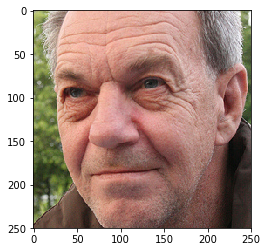

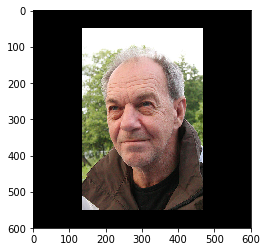

In [171]:
trans = transforms.CenterCrop(250)
trans_img = trans(sample_img)
imshow(trans_img)

trans = transforms.CenterCrop(600) #randomcrop의 길이가 어느한 쪽보다 길다면 자동 패딩!
trans_img = trans(sample_img)
imshow(trans_img)

### RandomCrop(size, padding=0) : 아무대나 자르기

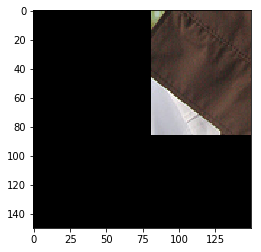

In [172]:
trans = transforms.RandomCrop(150,padding=300)  #양 옆에 패딩을 얼마나 주고 random하게 자를지!
trans_img = trans(sample_img)
imshow(trans_img)

### RandomHorizontalFlip : 수평방향으로 0.5씩의 확률로 돌리기

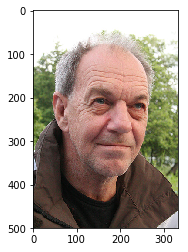

In [173]:
trans = transforms.RandomHorizontalFlip() 
trans_img = trans(sample_img)
imshow(trans_img)

### RandomVerticalFlip : 수직방향으로 0.5의  확률로 돌리기

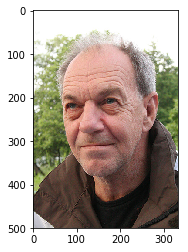

In [174]:
trans = transforms.RandomVerticalFlip() 
trans_img = trans(sample_img)
imshow(trans_img)

### RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.333333), interpolation=2) : resize + randomcrop?

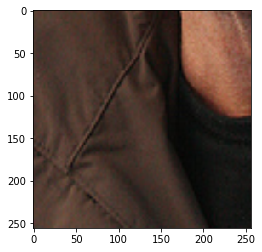

In [175]:
trans = transforms.RandomResizedCrop(256, scale=(0.004, 1.0), ratio=(0.01, 1.3333333333333333), interpolation=2) 
#size – expected output size of each edge
#scale – range of size of the origin size cropped 원본을 randsize로 만들고 crop. (1.0,1.0)이면 계속 원본그대로 나옴. range 1~1이거든.
#ratio – range of aspect ratio of the origin aspect ratio cropped 
#interpolation – Default: PIL.Image.BILINEAR
trans_img = trans(sample_img)
imshow(trans_img)

### Grayscale(num_output_channels=3) : 회색조로 바꾸기

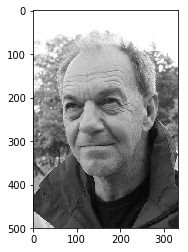

In [176]:
trans = transforms.Grayscale(3) # 1이면 single channel 3이면 rgb three channel로 반환
trans_img = trans(sample_img)
imshow(trans_img)

### RandomGrayscale(p=0.1) : 확률적으로 회색조로 바꾸기

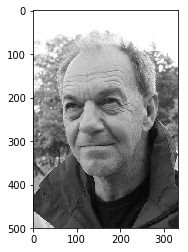

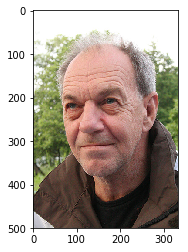

In [177]:
trans = transforms.RandomGrayscale(p=0.5) # 0.5의 확룔로 변환!
trans_img = trans(sample_img)
imshow(trans_img)
trans = transforms.RandomGrayscale(p=0.5) 
trans_img = trans(sample_img)
imshow(trans_img)

### FiveCrop(size) : 다섯군데 자르기

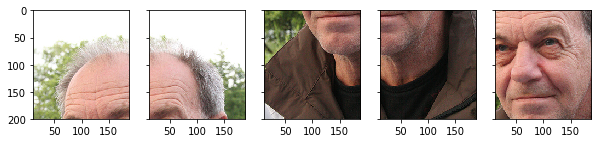

In [178]:
trans = transforms.FiveCrop(200) # 200사이즈로 양끝 + 가운데 총 5군데 crop
trans_img = trans(sample_img)    # 주의!! 이건 좀 다르게 각각 잘린 다양한 다섯개의 변환된 파일이 나온다. 

f, (ax1, ax2,ax3, ax4,ax5) = plt.subplots(1, 5, sharey=True)
f.set_size_inches(10,2)
ax_list = [ax1, ax2,ax3, ax4,ax5]
for i in range(5):
    ax_list[i].imshow(trans_img[i])

### TenCrop(size, vertical_flip=False) : 5군데 자르고 뒤집어서 한번 더 얹기. 고도리

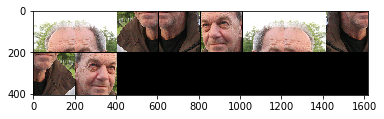

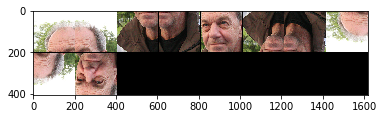

In [280]:
trans = transforms.TenCrop(200) # 200사이즈로 양끝 + 가운데 총 10군데 crop
trans_img = trans(sample_img)
tmp = [Tensor_trans(a)for a in trans_img]
tmp=torch.cat((tmp),0)
tmp = tmp.view(-1,3,200,200)
plt.figure()
grid =utils.make_grid(tmp)
plt.imshow(grid.numpy().transpose((1,2,0))) 
    
trans = transforms.TenCrop(200,vertical_flip=True) # 200사이즈로 양끝 + 가운데 총 10군데 crop
trans_img = trans(sample_img)
tmp = [Tensor_trans(a)for a in trans_img]
tmp=torch.cat((tmp),0)
tmp = tmp.view(-1,3,200,200)
plt.figure()
grid =utils.make_grid(tmp)
plt.imshow(grid.numpy().transpose((1,2,0))) 

### ColorJitter(brightness=0, contrast=0, saturation=0, hue=0) : 랜덤하게 brightness contrast saturation hue 변경

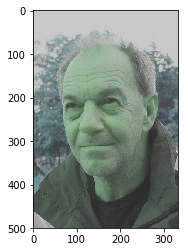

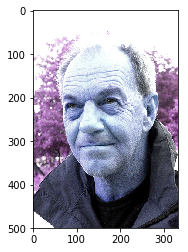

In [180]:
trans = transforms.ColorJitter(brightness=0.5,contrast=0.5,saturation=0.5,hue=0.5) #확률값 
trans_img = trans(sample_img)
imshow(trans_img)
#brightness (float) – How much to jitter brightness. brightness_factor is chosen uniformly from [max(0, 1 - brightness), 1 + brightness].
#contrast (float) – How much to jitter contrast. contrast_factor is chosen uniformly from [max(0, 1 - contrast), 1 + contrast].
#saturation (float) – How much to jitter saturation. saturation_factor is chosen uniformly from [max(0, 1 - saturation), 1 + saturation].
#hue (float) – How much to jitter hue. hue_factor is chosen uniformly from [-hue, hue]. Should be >=0 and <= 0.5.
trans = transforms.ColorJitter(brightness=0.5,contrast=0.5,saturation=0.5,hue=0.5) #확률값 
trans_img = trans(sample_img)
imshow(trans_img)

### Pad(padding, fill=0) : 패딩넣어주기

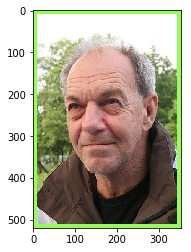

In [181]:
trans = transforms.Pad(10,fill=(150,250,90)) # 패딩크기, 패딩의 픽셀값. 컬러하면 튜플로 RGB값으로 줄수도 있다. 
trans_img = trans(sample_img)
imshow(trans_img)

### RandomRotation(degrees, resample=False, expand=False, center=None) : 랜덤하게 돌리기

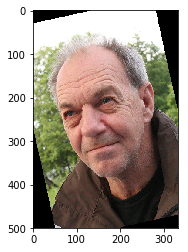

In [182]:
trans = transforms.RandomRotation(90) #최대 랜덤 각도
trans_img = trans(sample_img)
imshow(trans_img)

### transforms.Normalize(mean, std) : 이건 image가 Tensor일 때만! 각 채널의 input nomalization
### torchvision.transforms.ToTensor
### torchvision.transforms.ToPILImage(mode=None)

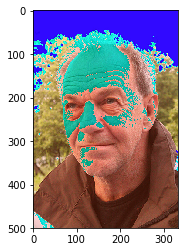

In [183]:
trans = transforms.Normalize((50,10,0),(1,1,1)) #주의!! each channel's mu and sigma
tensor_trans = transforms.ToTensor()
PIL_trans = transforms.ToPILImage()
tensor_img = (tensor_trans(sample_img))
norm_img = trans(tensor_img)
PIL_img = PIL_trans(norm_img)

imshow(PIL_img)

## 만약 내가 원하는 transform을 만들고 싶다면? example 
<n> object를 상속하고 _ _call_ _ 함수를 갖는 클래스로 만들자. 그냥 파이썬 기본 문법.

In [184]:
class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


# 4. Transform Pipeline : torchvision.transform.Compose()
다시 우리가 만든 facedataset Class를 보자! 

In [206]:
class facedataset(Dataset): ## torch.utils.data.Dataset
    
    def __init__(self,csv_file,root_dir,transform=None): #!!!!!!!!!
        """
        csv:좌표값 마크
        root_dir : 이미지 폴더 경로
        transform : 뒤에 더 자세히
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self,idx):
        img_name = os.path.join(self.root_dir,self.landmarks_frame.iloc[idx,0])
        img = sk_io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx,1:].as_matrix()
        landmarks = landmarks.astype('float').reshape(-1,2)
        landmarks = torch.from_numpy(landmarks)
        if self.transform :
            img = self.transform(img)
        
        sample = {'img':img,'landmark':landmarks}
        return sample
    
    def help(self):
        dict_keys =['img','landmark']
        print('dict_key is {}'.format(dict_keys))

In [207]:
# Compose 안에 List로 변환 순서대로 넣기!
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.CenterCrop(150),
    transforms.RandomRotation(50),
    transforms.ToTensor(),
])

In [208]:
face_dataset = facedataset(csv_file='./data/faces/face_landmarks.csv',root_dir='./data/faces/',transform=transform)

In [209]:
sample = face_dataset[0]

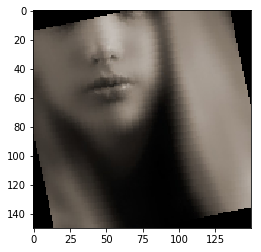

In [210]:
imshow(PIL_trans(sample['img']))

dset, dataloader 추가

## 5. Dataset iterating 돌리기 : torch.utils.data.DataLoader

In [212]:
for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['img'].size(), sample['landmark'].size())

    if i == 3:
        break

0 torch.Size([3, 150, 150]) torch.Size([68, 2])
1 torch.Size([3, 150, 150]) torch.Size([68, 2])
2 torch.Size([3, 150, 150]) torch.Size([68, 2])
3 torch.Size([3, 150, 150]) torch.Size([68, 2])


This is too old fashion. What can we use for iteration dataset? 
DataLoader!
<n> * Batching / Shuffling / Multipocessing

In [213]:
from torch.utils.data import Dataset,DataLoader

In [215]:
dataloader = DataLoader(face_dataset,batch_size=16,shuffle=True,num_workers=2)

In [237]:
def show_batchimg(sample_batch):
    img_batch, landmark_batch = sample_batch['img'],sample_batch['landmark']
    batch_size = len(img_batch)
    im_size = img_batch.size(2)
    print(img_batch.size())
    grid =utils.make_grid(img_batch)
    plt.imshow(grid.numpy().transpose((1,2,0)))

0 torch.Size([16, 3, 150, 150]) torch.Size([16, 68, 2])
1 torch.Size([16, 3, 150, 150]) torch.Size([16, 68, 2])
2 torch.Size([16, 3, 150, 150]) torch.Size([16, 68, 2])
3 torch.Size([16, 3, 150, 150]) torch.Size([16, 68, 2])
torch.Size([16, 3, 150, 150])
4 torch.Size([5, 3, 150, 150]) torch.Size([5, 68, 2])


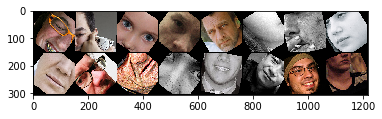

In [238]:
for i, sample_batch in enumerate(dataloader):
    print(i,sample_batch['img'].size(),sample_batch['landmark'].size())
    
    if(i==3):
        plt.figure()
        show_batchimg(sample_batch)

## 6. Image Folder : torchvision.datasets.ImageFolder

auto-labeling by each img's folder name 

In [220]:
from torchvision import datasets

In [241]:
data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])#transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
hymenoptera_dataset = datasets.ImageFolder(root='data/hymenoptera_data/train',
                                           transform=data_transform)


dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

In [242]:
print(hymenoptera_dataset.classes)
print(hymenoptera_dataset.class_to_idx)
print(hymenoptera_dataset.imgs)

['ants', 'bees']
{'ants': 0, 'bees': 1}
[('data/hymenoptera_data/train/ants/0013035.jpg', 0), ('data/hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg', 0), ('data/hymenoptera_data/train/ants/1095476100_3906d8afde.jpg', 0), ('data/hymenoptera_data/train/ants/1099452230_d1949d3250.jpg', 0), ('data/hymenoptera_data/train/ants/116570827_e9c126745d.jpg', 0), ('data/hymenoptera_data/train/ants/1225872729_6f0856588f.jpg', 0), ('data/hymenoptera_data/train/ants/1262877379_64fcada201.jpg', 0), ('data/hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg', 0), ('data/hymenoptera_data/train/ants/1286984635_5119e80de1.jpg', 0), ('data/hymenoptera_data/train/ants/132478121_2a430adea2.jpg', 0), ('data/hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg', 0), ('data/hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg', 0), ('data/hymenoptera_data/train/ants/1473187633_63ccaacea6.jpg', 0), ('data/hymenoptera_data/train/ants/148715752_302c84f5a4.jpg', 0), ('data/hymenoptera_data/train/ants/148

### Data_loader caution

torch.Size([4, 3, 224, 224])

 0
 0
 0
 1
[torch.LongTensor of size 4]

torch.Size([4, 3, 224, 224])

 0
 0
 0
 0
[torch.LongTensor of size 4]



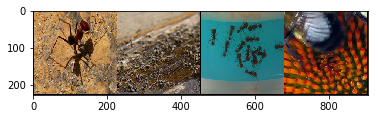

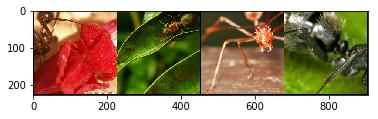

In [243]:
for i,batch in enumerate(dataset_loader):  #always loader read per batch.
    img,label = batch # then You can split batch into parts you want.  
    print(img.size())
    print(label)
    plt.figure()
    grid =utils.make_grid(img)
    plt.imshow(grid.numpy().transpose((1,2,0))) 
    #you shold transpose (1,2,0) for match WidthxHeightxDim 
    if(i==1):break